<a href="https://colab.research.google.com/github/claudiohfg/notebooks/blob/main/covid_rj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 no estado do Rio de Janeiro

O presente estudo tem por objetivo analisar parte dos dados de casos de COVID-19 no Estado do Rio de Janeiro. Para isso, os dados foram baixados da plataforma oficial do governo estadual, responsável por divulgar a evolução dessa doença no nosso Estado.

https://painel.saude.rj.gov.br/monitoramento/covid19.html

Nessa página é possível observar um painel contendo as informações resumidas de casos confirmados (2.251), óbitos confirmados (141), casos recuperados (812), taxa de ocupação de enfermarias (46%) e taxa de ocupação de UTI COVID (68%). Os valores entre parêntesis são referentes ao dia 6 de março de 2021, às 11h33.

Os dados baixados estão em **FONTE DE DADOS**, depois em **DOWNLOAD DADOS COVID**.

## Importação de bibliotecas

O primeiro passo é importar as bibliotecas que serão utilizadas nessa análise.

In [1]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importação dos dados

Os dados baixados estão no formato CSV, eles foram previamente convertidos em planilha Excel para reduzir o tamanho do arquivo.

In [2]:
data = pd.read_csv('COVID_20210315.CSV', 
                   sep=';', dtype={
                       'sexo': 'str',
                       'idade': 'float',
                       'municipio_res': 'str',
                       'uf': 'str',
                       'classificacao': 'str',
                       'evolucao': 'str',
                       'comorbidade': 'str',
                       'dias': 'float',
                       'bairro': 'str',
                       'cep': 'str'
                   }, parse_dates=[
                       'dt_sintoma',
                       'dt_coleta_dt_notif',
                       'dt_obito',
                       'dt_evento'
                   ])

In [3]:
for col in data.columns:
    if str(data[col].dtype) == 'object':
        data[col] = data[col].str.strip()

In [4]:
data.head()

,sexo,idade,municipio_res,uf,dt_sintoma,dt_coleta_dt_notif,classificacao,evolucao,dt_obito,comorbidade,dias,dt_evento,bairro,cep
0,M,63.0,MARICA,RJ,2020-12-26,2021-01-04,CONFIRMADO,NaN,NaT,NaN,74.0,2020-12-26,BARROCO,NaN
1,F,46.0,NOVA IGUACU,RJ,2020-05-05,2020-05-05,CONFIRMADO,NaN,NaT,NaN,309.0,2020-05-05,NaN,26000000
2,M,28.0,SAO GONCALO,RJ,2020-11-28,2021-01-21,CONFIRMADO,NaN,NaT,NaN,102.0,2020-11-28,PORTO DA MADEIRA,24800000
3,M,23.0,MACAE,RJ,2020-05-03,2020-05-06,CONFIRMADO,NaN,NaT,NaN,311.0,2020-05-03,PARQUE AEROPORTO,NaN
4,M,23.0,MACAE,RJ,2020-05-01,2020-05-03,CONFIRMADO,NaN,NaT,NaN,313.0,2020-05-01,AJUDA DE BAIXO,27910000


No site de onde esses dados foram baixados, não foi encontrado um dicionário de dados, então o significado de cada feature teve que ser interpretado.

## Análise dos dados

In [5]:
data.dtypes

sexo                          object
idade                        float64
municipio_res                 object
uf                            object
dt_sintoma            datetime64[ns]
dt_coleta_dt_notif    datetime64[ns]
classificacao                 object
evolucao                      object
dt_obito              datetime64[ns]
comorbidade                   object
dias                         float64
dt_evento             datetime64[ns]
bairro                        object
cep                           object
dtype: object

Há quatro campos de data:
- dt_sintoma: data que o paciente relatou ter apresentado os primeiros sintomas;
- dt_coleta_dt_notif: data em que os dados do paciente entraram no sistema;
- dt_obito: data do falecimento;
- dt_evento: data do evento, que pode ser tanto igual a dt_sintoma, quanto a dt_obito.

In [6]:
print(f'Total de registros = {data.shape[0]}')
print(f'dt_sintoma igual a dt_evento = {data[data.dt_sintoma == data.dt_evento].shape[0]}')
print(f'dt_obito igual a dt_evento = {data[data.dt_sintoma == data.dt_obito].shape[0]}')

Total de registros = 599572
dt_sintoma igual a dt_evento = 599033
dt_obito igual a dt_evento = 3140


Eis um exemplo dos dados contidos no arquivo.

In [7]:
data.head()

,sexo,idade,municipio_res,uf,dt_sintoma,dt_coleta_dt_notif,classificacao,evolucao,dt_obito,comorbidade,dias,dt_evento,bairro,cep
0,M,63.0,MARICA,RJ,2020-12-26,2021-01-04,CONFIRMADO,NaN,NaT,NaN,74.0,2020-12-26,BARROCO,NaN
1,F,46.0,NOVA IGUACU,RJ,2020-05-05,2020-05-05,CONFIRMADO,NaN,NaT,NaN,309.0,2020-05-05,NaN,26000000
2,M,28.0,SAO GONCALO,RJ,2020-11-28,2021-01-21,CONFIRMADO,NaN,NaT,NaN,102.0,2020-11-28,PORTO DA MADEIRA,24800000
3,M,23.0,MACAE,RJ,2020-05-03,2020-05-06,CONFIRMADO,NaN,NaT,NaN,311.0,2020-05-03,PARQUE AEROPORTO,NaN
4,M,23.0,MACAE,RJ,2020-05-01,2020-05-03,CONFIRMADO,NaN,NaT,NaN,313.0,2020-05-01,AJUDA DE BAIXO,27910000


In [8]:
data.isna().sum()

sexo                       0
idade                  29873
municipio_res              0
uf                         0
dt_sintoma               539
dt_coleta_dt_notif       470
classificacao              0
evolucao              565679
dt_obito              565810
comorbidade           599572
dias                     425
dt_evento                425
bairro                255666
cep                   265259
dtype: int64

In [9]:
# Proporção de óbitos
data.isna().sum().loc['dt_obito']/data.shape[0]

0.9436898320802172

Vejamos como se comportam algumas features.

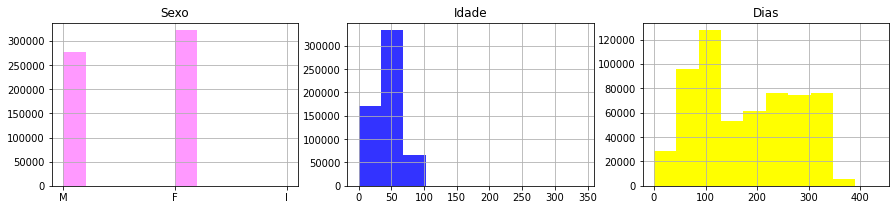

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3)
cores = ['#ff99ff', '#3333ff', '#ffff00']
for i, col in enumerate(['sexo', 'idade', 'dias']):
    data[col].hist(figsize=(15, 3), color=cores[i], ax=axes[i])
    axes[i].set_title(col[0].upper() + col[1:])
plt.show()

A base de dados contém mais entradas com pessoas do sexo feminino, a distribuição de idades concentra mais pacientes entre 30 e 60 anos e a feature dias indica a existência de duas ondas de contaminação.

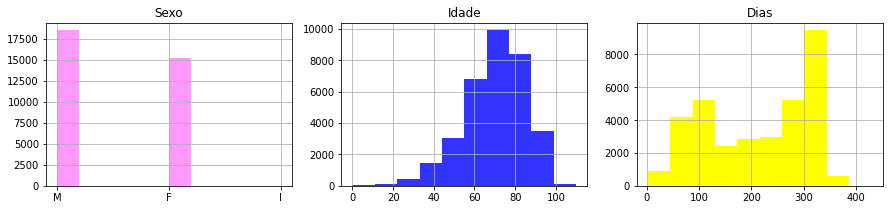

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3)
cores = ['#ff99ff', '#3333ff', '#ffff00']
for i, col in enumerate(['sexo', 'idade', 'dias']):
    data.loc[data.dt_obito.notna(), col].hist(figsize=(15, 3), color=cores[i], ax=axes[i])
    axes[i].set_title(col[0].upper() + col[1:])
plt.show()

Dentre os pacientes que vieram a óbito, a maior parte é do sexo masculino e não há informação de suas idades.

## Engenharia de dados

Será criada uma feature qt_pacientes para armazenar a quantidade de pacientes por registro. Essa feature será utilizada para calcular a quantidade total de pacientes em cada data selecionada.

In [12]:
df = data.copy()

In [13]:
df['qt_pacientes'] = 1

Agora vamos analisar como as datas se relacionam entre si. A data dos primeiros sintomas deve ser sempre a mais antiga e deve, preferencialmente, sempre estar presente, porque não é possível dizer com certeza que uma pessoa faleceu de COVID-19 se não apresentar sintomas.

#### Data de primeiros sintomas vs Data de notificação

Primeiro vamos comparar a data dos primeiros sintomas com a data de notificação.

In [14]:
ds = df[
    (df.dt_sintoma.notna()) & (df.dt_coleta_dt_notif.notna())
].copy()

antes, depois = ds[
    ds.dt_sintoma > ds.dt_coleta_dt_notif
].shape, ds[
    ds.dt_sintoma <= ds.dt_coleta_dt_notif
].shape

print(f'Notificações anteriores a sintomas = {antes[0]}')
print(f'Notificações posteriores a sintomas = {depois[0]}')

Notificações anteriores a sintomas = 2970
Notificações posteriores a sintomas = 596018


Como se pode observar, temos ocorrências que não deveriam acontecer. O paciente não tem como informar que vai apresentar sintomas no futuro. Vamos expurgar esses dados da nossa análise.

In [15]:
df.drop(index=ds[ds.dt_sintoma > ds.dt_coleta_dt_notif].index, inplace=True)
ds.drop(index=ds[ds.dt_sintoma > ds.dt_coleta_dt_notif].index, inplace=True)

A seguir, temos a média e o desvio-padrão entre as datas de sintoma e notificação. Com uma diferença média de 14 dias, isto é, na média, os pacientes levam duas semanas para reportar seus casos, e desvio-padrão de 23, isto é, o tempo entre os primeiros sintomas e a notificação pode variar até 37 dias, ou seja, casos de um mês parecem ser sistematicamente reportados em meses posteriores, poluindo a base. Essa bandeira vermelha indica que a data de notificação é um indicador ruim para analisar essa base.

In [16]:
ds.apply(lambda row: row['dt_coleta_dt_notif'] - row['dt_sintoma'], axis=1).describe()

count                        596018
mean     14 days 08:01:35.433359373
std      21 days 20:02:38.340222824
min                 0 days 00:00:00
25%                 3 days 00:00:00
50%                 7 days 00:00:00
75%                15 days 00:00:00
max               414 days 00:00:00
dtype: object

Vejamos como esse atraso tem se comportado em 2021.

In [17]:
ds[ds.dt_sintoma > datetime(2020, 12, 31)].apply(lambda row: row['dt_coleta_dt_notif'] - row['dt_sintoma'], axis=1).describe()

count                        76877
mean     8 days 02:08:29.770152321
std      9 days 07:16:21.751838830
min                0 days 00:00:00
25%                3 days 00:00:00
50%                5 days 00:00:00
75%               10 days 00:00:00
max               67 days 00:00:00
dtype: object

O gráfico abaixo deixa mais claro a quantidade de casos reportados em um intervalo de tempo superior a 7 dias.

In [18]:
ds['delta'] = ds.apply(lambda row: row['dt_coleta_dt_notif'] - row['dt_sintoma'], axis=1)
ds.delta = ds.delta.apply(lambda x: x.days)

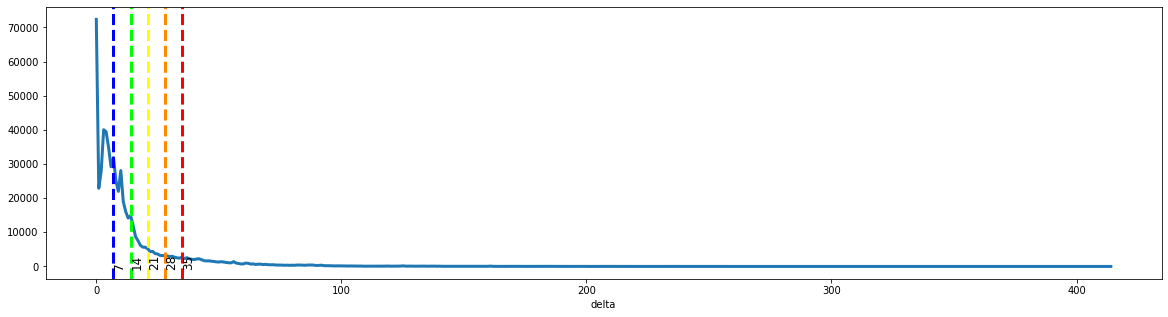

In [19]:
ds.groupby('delta')['qt_pacientes'].count().plot(figsize=(20,5), linewidth=3)
for delta, cor in zip([x*7 for x in range(1, 6)], ['#0000ff', '#00ff00', '#ffff00', '#ff8800', '#ff0000']):
    plt.axvline(delta, color=cor, linestyle="--", linewidth=3)
    plt.text(delta, 5, str(delta), rotation=90, fontsize='large')

#### Data de primeiros sintomas vs Data de óbitos

In [20]:
ds = df[
    (df.dt_sintoma.isna()) & (df.dt_obito.notna())
].copy()

print(f'Tivemos {ds.shape[0]} casos de óbitos sem sintomas.')

Tivemos 0 casos de óbitos sem sintomas.


In [21]:
ds = df[
    (df.dt_sintoma.notna()) & (df.dt_obito.notna())
].copy()

antes, depois = ds[
    ds.dt_sintoma > ds.dt_obito
].shape, ds[
    ds.dt_sintoma <= ds.dt_obito
].shape

print(f'Óbitos anteriores a sintomas = {antes[0]}')
print(f'Óbitos posteriores a sintomas = {depois[0]}')

Óbitos anteriores a sintomas = 0
Óbitos posteriores a sintomas = 33762


In [22]:
ds.apply(lambda row: row['dt_obito'] - row['dt_sintoma'], axis=1).describe()

count                         33762
mean     15 days 21:47:51.938866181
std      16 days 11:37:05.101951114
min                 0 days 00:00:00
25%                 6 days 00:00:00
50%                13 days 00:00:00
75%                21 days 00:00:00
max               391 days 00:00:00
dtype: object

A relação entre data de óbito e data de sintomas está adequada. Todos os óbitos ocorreram após os primeiros sintomas. Em média, os óbitos ocorreram entre 15 e 31 dias após o surgimento dos primeiros sintomas.

#### Data de notificação vs Data de óbitos

In [23]:
ds = df[
    (df.dt_coleta_dt_notif.isna()) & (df.dt_obito.notna())
].copy()

print(f'Tivemos {ds.shape[0]} casos de óbitos não notificados.')

Tivemos 0 casos de óbitos não notificados.


In [24]:
ds = df[
    (df.dt_coleta_dt_notif.notna()) & (df.dt_obito.notna())
].copy()

antes, depois = ds[
    ds.dt_coleta_dt_notif > ds.dt_obito
].shape, ds[
    ds.dt_coleta_dt_notif <= ds.dt_obito
].shape

print(f'Óbitos anteriores a notificações = {antes[0]}')
print(f'Óbitos posteriores a notificações = {depois[0]}')

Óbitos anteriores a notificações = 4612
Óbitos posteriores a notificações = 29150


In [25]:
ds.apply(lambda row: row['dt_obito'] - row['dt_coleta_dt_notif'], axis=1).describe()

count                         33762
mean      6 days 11:54:29.877376932
std      18 days 14:33:38.078137167
min             -366 days +00:00:00
25%                 0 days 00:00:00
50%                 5 days 00:00:00
75%                12 days 00:00:00
max               369 days 00:00:00
dtype: object

A relação entre a data de notificação e a data de óbito reflete o que foi observado entre a data de primeiros sintomas e a data de óbito. O tempo médio entre a data de notificação e o óbito é de 6 dias, podendo chegar a 24 dias.

### Análise dos dados acumulados de quantidades de pacientes por tipo de data

Para facilitar o trabalho de criação da acumulação de quantidade de pacientes por data, será criada uma função que recebe o dataframe e a data e retorna um novo dataframe com a quantidade total de pacientes por data.

In [26]:
def acumulador(
    dataframe: pd.DataFrame, 
    feature_data: str, feature_acumular='qt_pacientes') -> pd.DataFrame:
    """
    Retorna um dataframe com a totalização da feature_acumular agrupada
    pela feature_data.
    
    Parâmetros:
    -----------
        dataframe: pd.DataFrame
            Dataframe contendo os dados a serem acumulados.
        feature_data: str
            Nome da feature de data que será utilizada para agrupar os dados.
        feature_acumular: str
            Nome da feature a ser totalizada. Por padrão, qt_pacientes.
    
    Retorno:
    --------
        dataframe: pd.DataFrame
            Novo dataframe com a totalização da feature_acumular agrupada
            pela feature_data.
    """
    ds = dataframe[
        dataframe[feature_data].notna()
    ].groupby(feature_data)[feature_acumular].count().reset_index().copy()
    
    ds.rename(columns={feature_data: 'Data'}, inplace=True)
    ds.set_index('Data', inplace=True)
    
    return ds

Serão criados 3 dataframes, um para cada feature de data a ser analisada: a data que o paciente relatou os primeiros sintomas, ou seja, a data aproximada de contaminação; a data do óbito; e a data da notificação, a data em que as informações sobre o novo caso foram inseridas no sistema do governo.

In [27]:
sintomas = acumulador(df, 'dt_sintoma')
obitos = acumulador(df, 'dt_obito')
notificacoes = acumulador(df, 'dt_coleta_dt_notif')

A função abaixo é utilizada para determinar as melhores coordenadas no gráfico para se inserir um texto explicativo.

In [28]:
def get_coordenadas(
    dataframe: pd.DataFrame, feature='qt_pacientes', 
    offset_x=0.3, offset_y=0.95) -> tuple:
    """
    Analisa a melhor posição em um gráfico para se inserir um texto
    explicativo, com base na escala do gráfico e nos deslocamentos desejados.
    
    Parâmetros:
    -----------
        dataframe: pd.DataFrame
            Dataframe contendo os dados de escala a serem analisados.
        feature: str
            Nome da feature cuja escala será analisada.
        offset_x: float
            Deslocamento da coordenada X.
        offset_y: float
            Deslocamento da coordenada Y.
    
    Retorno:
    --------
        (x, y): tuple
            Tupla de coordenadas (x, y), resultado da análise.
    """
    x = list(enumerate(dataframe.index.to_list()))
    x = list(filter(
        lambda a: a[0] == int(len(x) * offset_x), 
        x))[0][1]
    y = dataframe[feature].max() * offset_y
    
    return (x, y)

## Análise gráfica das features

Primeiro será plotado o gráfico com os dados de contaminação, lembrando que as datas são as datas que os pacientes informaram ter apresentado os primeiros sintomas.

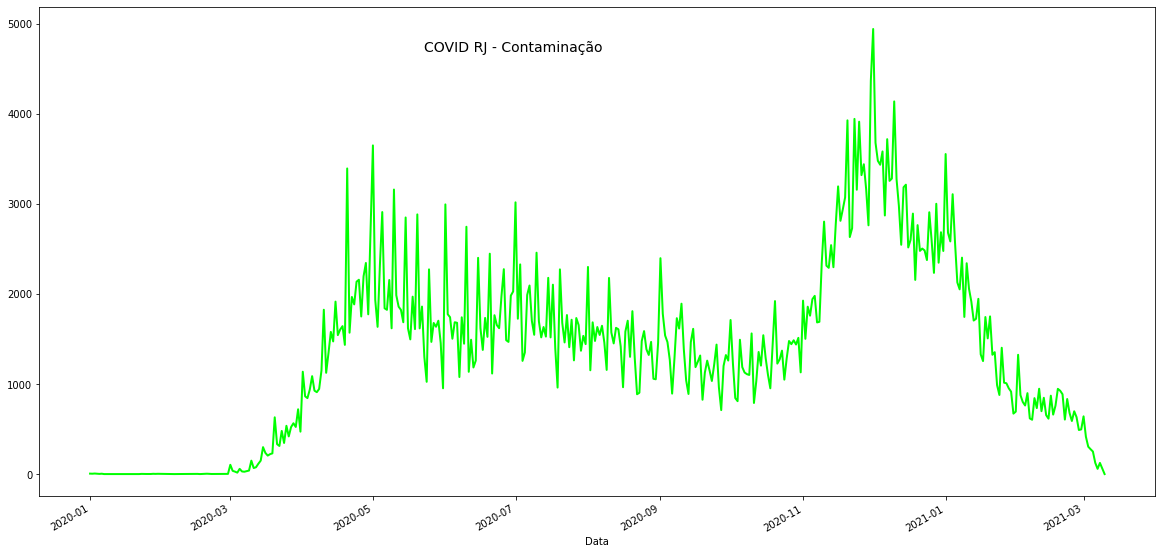

In [29]:
sintomas['qt_pacientes'].plot(figsize=(20,10), color='#00ff00', linewidth=2)
plt.text(
    *get_coordenadas(sintomas), 
    f'COVID RJ - Contaminação', rotation=0, fontsize=14);

Conforme é possível observar acima, há duas ondas, sendo a primeira mais baixa, porém duas vezes mais alongada que a segunda.

Agora será plotado o gráfico com os dados de óbitos.

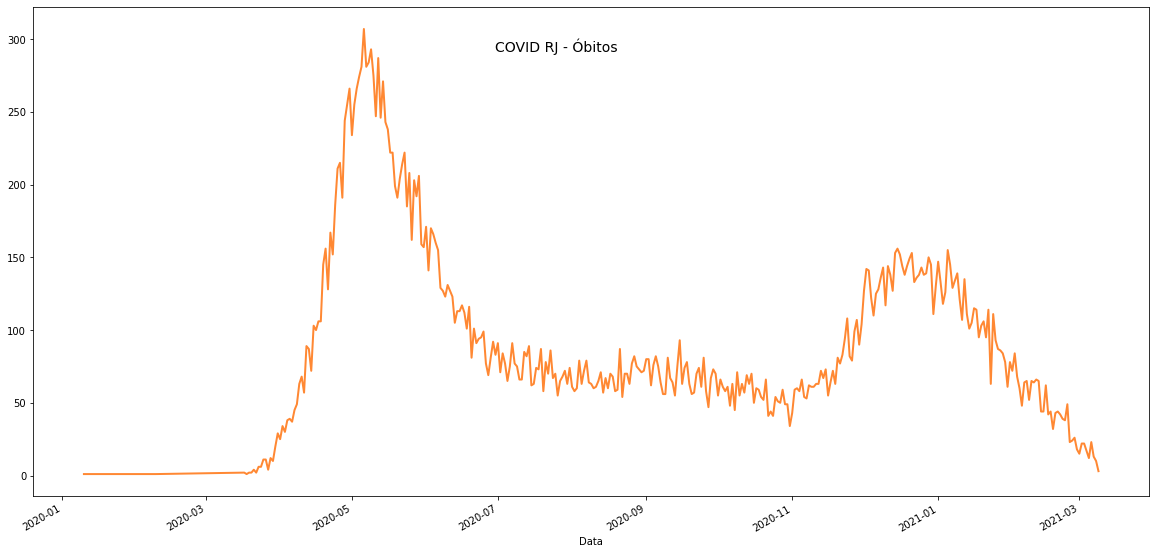

In [30]:
obitos['qt_pacientes'].plot(figsize=(20,10), color='#ff8833', linewidth=2)
plt.text(
    *get_coordenadas(obitos), 
    f'COVID RJ - Óbitos', rotation=0, fontsize=14);

Como se pode observar, aqui também há duas ondas, porém a primeira é mais alta e mais alongada que a segunda.

Por fim, será plotado o gráfico com os dados de notificações.

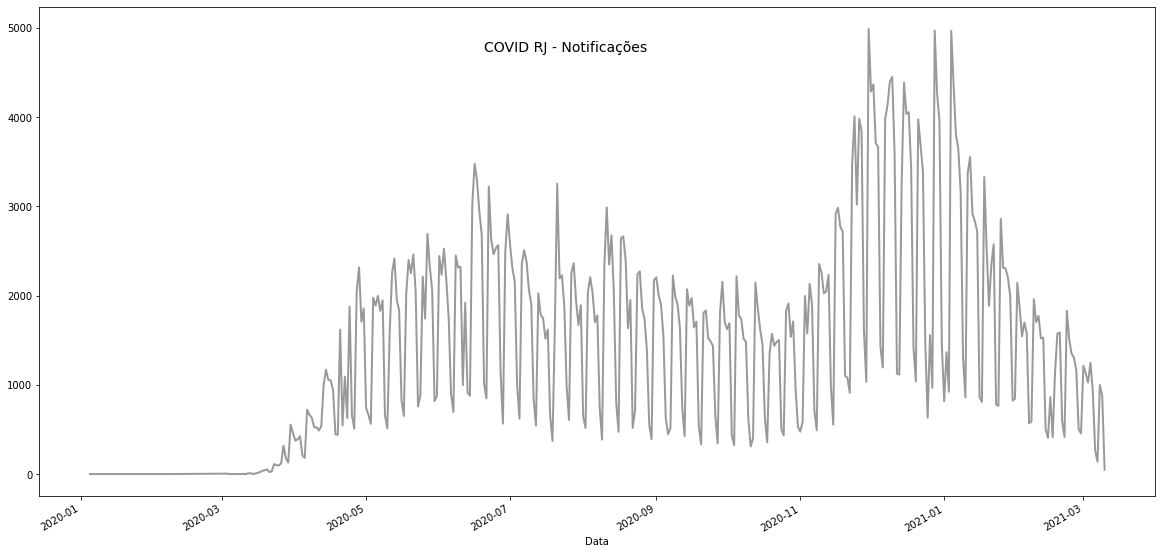

In [31]:
notificacoes['qt_pacientes'].plot(figsize=(20,10), color='#999999', linewidth=2)
plt.text(
    *get_coordenadas(notificacoes), 
    f'COVID RJ - Notificações', rotation=0, fontsize=14);

Como se pode observar, aqui também há duas ondas, sendo a primeira mais baixa, porém duas vezes mais alongada que a segunda, que é mais alta. Também é possível observar que esse gráfico é falhado nos finais de semana, o que indica que há uma acumulação de notificações no começo de cada semana que deveria ser diluído em dias anteriores, não necessariamente o final de semana. Essa característica faz com que esse gráfico dê a impressão de haver mais casos que os de fato existem, pois o leitor foca nos picos, ignorando os vales.

Ao analisarmos o impacto de grandes eventos sociais na evolução da doença, mostraremos qual a variação do total de casos e do total de dias entre as duas ondas observadas acima.

### Médias móveis

Agora serão analisadas as médias móveis nos 3 dataframes. Serão criadas as features mva_7, mva_15 e mva_30 para armazenar os dados de médias móveis de dias anteriores, respectivamente de 7, 15 e 30.

A média móvel nada mais é que a média dos últimos dias, por exemplo, a média móvel de 7 dias é a média dos últimos 7 dias calculada para cada dia do ano. É importante notar que os primeiros 6 dias da série, no caso da média móvel de 7 dias, não possuem valores para essas médias por conta dos dados serem insuficientes. Esse fato não altera a análise.

Quando uma média móvel de curto prazo cruza uma média móvel de prazo mais longo, isso é um indicativo de mudança de tendência. Por exemplo, se a média móvel de 7 dias cruzar a média móvel de 30 dias para baixo, é um indicativo de tendência de queda. Agora, se a média móvel de 7 dias cruzar a média móvel de 30 dias pra cima, é um indicativo de tendência de aumento de casos.

Há diversos tipos de médias móveis, mas aqui serão utilizadas as médias aritméticas móveis, isto é, a soma do total de casos divididos pelo total de dias da média.

In [32]:
for dataframe in [sintomas, obitos, notificacoes]:
    dataframe['mva_7'] = dataframe['qt_pacientes'].rolling(window=7).mean()
    dataframe['mva_15'] = dataframe['qt_pacientes'].rolling(window=15).mean()
    dataframe['mva_30'] = dataframe['qt_pacientes'].rolling(window=30).mean()

Primeiro será plotado o gráfico com os dados de contaminação junto com suas médias móveis, calculadas acima.

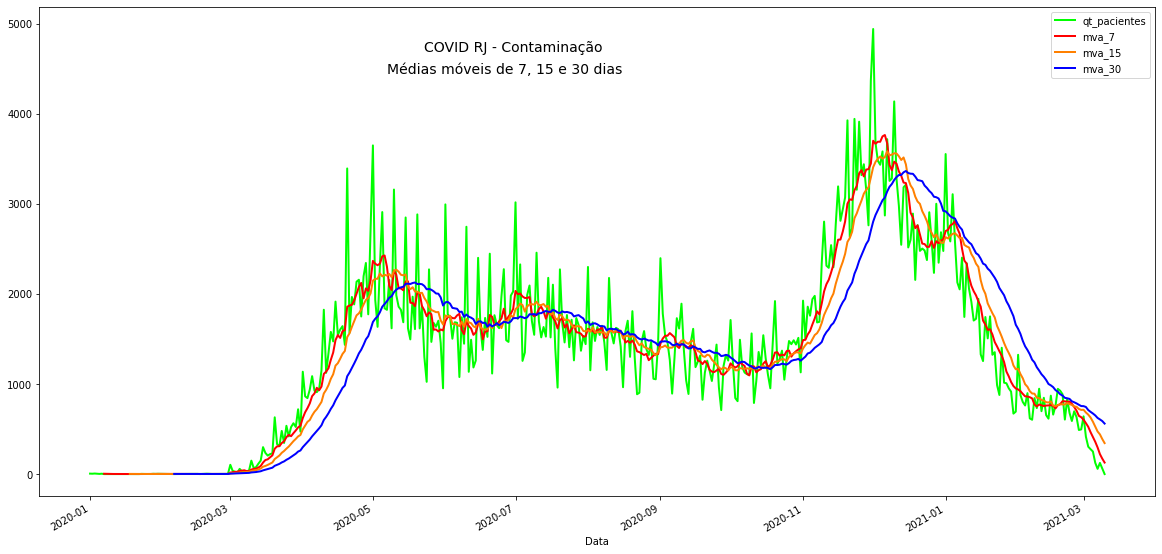

In [33]:
sintomas.plot(figsize=(20,10), color=['#00ff00', '#ff0000', '#ff8000', '#0000ff'], linewidth=2)
plt.text(
    *get_coordenadas(sintomas), 
    f'COVID RJ - Contaminação', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(sintomas, offset_x=0.26, offset_y=0.9), 
    f'Médias móveis de 7, 15 e 30 dias', rotation=0, fontsize=14);

Como se pode observar, ao longo de 2020 as médias móveis inverteram suas posições algumas vezes, indicando mudança da velocidade de contaminação. No entando, desde o início de 2021, há uma tendência assintótica de queda para todas as médias.

Agora será plotado o gráfico com os dados de óbitos junto com suas médias móveis, calculadas acima.

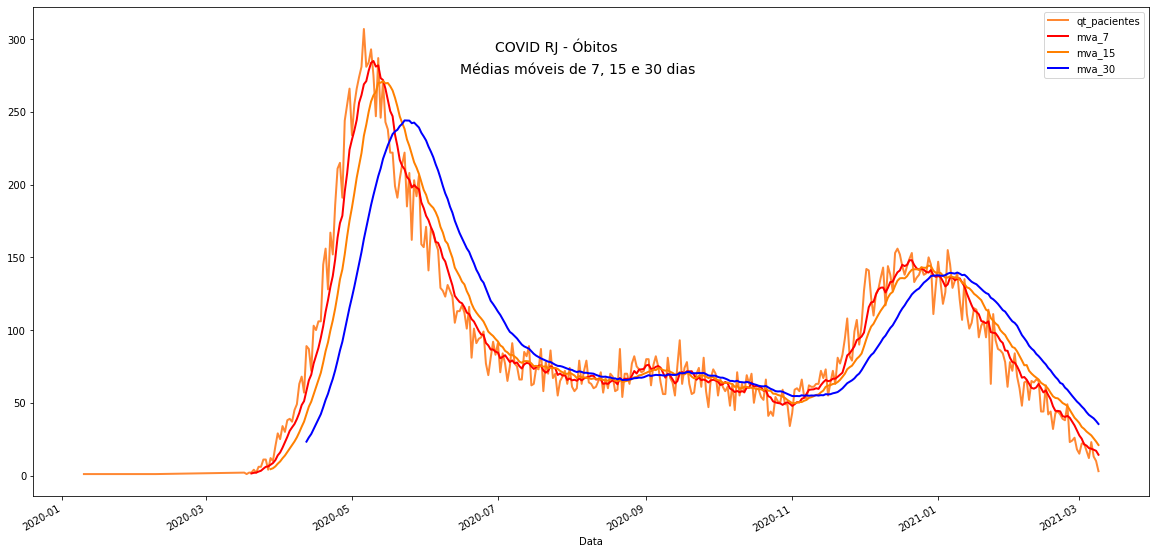

In [34]:
obitos.plot(figsize=(20,10), color=['#ff8833', '#ff0000', '#ff8000', '#0000ff'], linewidth=2)
plt.text(
    *get_coordenadas(obitos), 
    f'COVID RJ - Óbitos', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(obitos, offset_x=0.26, offset_y=0.9), 
    f'Médias móveis de 7, 15 e 30 dias', rotation=0, fontsize=14);

Como se pode observar, ao longo de 2020 as médias móveis inverteram suas posições umas poucas vezes, indicando mudança da velocidade de contaminação. No entando, desde o início de 2021, há uma tendência de queda para todas as médias.

Por fim, será plotado o gráfico com os dados de notificações junto com suas médias móveis, calculadas acima.

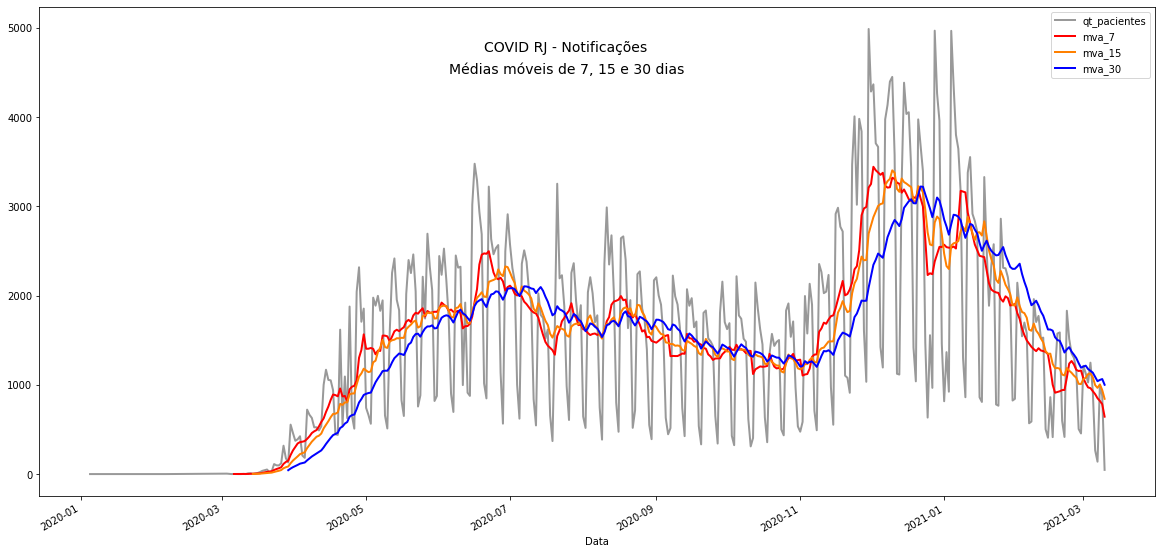

In [35]:
notificacoes.plot(figsize=(20,10), color=['#999999', '#ff0000', '#ff8000', '#0000ff'], linewidth=2)
plt.text(
    *get_coordenadas(notificacoes), 
    f'COVID RJ - Notificações', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(notificacoes, offset_x=0.26, offset_y=0.9), 
    f'Médias móveis de 7, 15 e 30 dias', rotation=0, fontsize=14);

Como se pode observar, em decorrência do acúmulo de notificações no início de cada semana, ao longo de 2020, as médias móveis alternam de posição muitas vezes, uma hora indicando tendência de queda, outra hora indicando tendência de subida, o que demonstra que esse indicador baseado na data de notificação é um indicador ruim para determinar a tendência de evolução dessa doença.

Ainda assim, desde o início de 2021, essas médias móveis tem mostrado uma tendência de queda, com poucos cruzamentos entre as médias e a média móvel de prazo mais longo se mantendo acima das demais.

### Grandes eventos sociais

Tem sido noticiado que a segunda onda começou em decorrência das festas de Natal e ano novo. Alguns meios apontam que a segunda onda pode ter iniciado em decorrência das campanhas eleitorais. VEssas datas serão indicadas nos gráficos para verificar se é possível perceber alguma correlação.

Para a data das eleições, utilizaremos o dia primeiro de novembro, que é quando de fato as campanhas eleitorais se intensificaram.

In [36]:
eventos = [ 
    [datetime(2020,2,22), 'Carnaval', '#00ffff'],
    [datetime(2020,11,1), 'Eleições', '#ff8000'],
    [datetime(2020,12,25), 'Natal', '#ff0000'],
    [datetime(2020,12,31), 'Ano novo', '#ff66b2'],
]

In [37]:
def comparacao_ondas(dataframe: pd.DataFrame, data_limite=datetime(2020,11,1)) -> tuple:
    """
    Compara a quantidade total de casos e a duração entre as duas ondas observadas.
    
    Parâmetros:
    -----------
        dataframe: pd.DataFrame
            Dataframe contendo os dados a serem analisados.
        data_limite: datetime
            Dia que delimita as duas ondas.
    
    Retorno:
    --------
        (float, float): tuple
            Tupla com a variação percentual de casos entre a segunda e a
            primeira onda e a variação percentual de dias entre a segunda
            e a primeira onda.
    """
    primeira_onda = dataframe[dataframe.index < data_limite]
    segunda_onda = dataframe[dataframe.index >= data_limite]
    
    primeira_onda_total_casos = primeira_onda.qt_pacientes.sum()
    segunda_onda_total_casos = segunda_onda.qt_pacientes.sum()
    
    primeira_onda_total_dias = (datetime(2020,11,1) - primeira_onda.index[0]).days
    segunda_onda_total_dias = (segunda_onda.index[-1] - datetime(2020,11,1)).days
    
    return (
        100 * segunda_onda_total_casos/primeira_onda_total_casos,
        100 * segunda_onda_total_dias/primeira_onda_total_dias
    )

Primeiro será plotado o gráfico de contaminações com as três datas mencionadas.

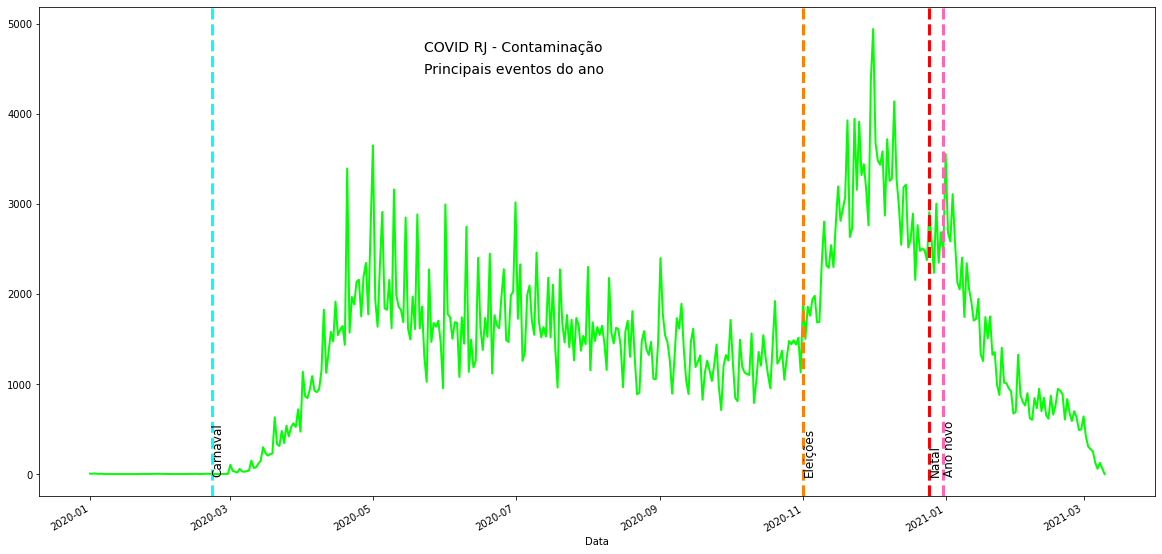

In [38]:
sintomas['qt_pacientes'].plot(figsize=(20,10), color='#00ff00', linewidth=2)
plt.text(
    *get_coordenadas(sintomas), 
    f'COVID RJ - Contaminação', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(sintomas, offset_y=0.9), 
    f'Principais eventos do ano', rotation=0, fontsize=14);
for evento in eventos:
    data, label, cor = evento
    plt.axvline(data, color=cor, linestyle="--", linewidth=3)
    plt.text(data, 5, label, rotation=90, fontsize='large')
plt.show()

Como se pode observar, o carnaval de 2020 foi o início dos casos de contaminações, as eleições parecem ter tido um papel essencial no surgimento da segunda onda, enquanto após o Natal e ano novo, apesar do surgimento de um pico local, a curva continuou com tendência de queda a partir do último pico, no início de dezembro.

In [39]:
casos, dias = comparacao_ondas(sintomas)

print(f'A segunda onda durou {dias:.2f}% do tempo da primeira onda e teve {casos:.2f}% de casos da primeira onda.')

A segunda onda durou 42.30% do tempo da primeira onda e teve 72.52% de casos da primeira onda.


Agora será plotado o gráfico de óbitos com as três datas mencionadas acima.

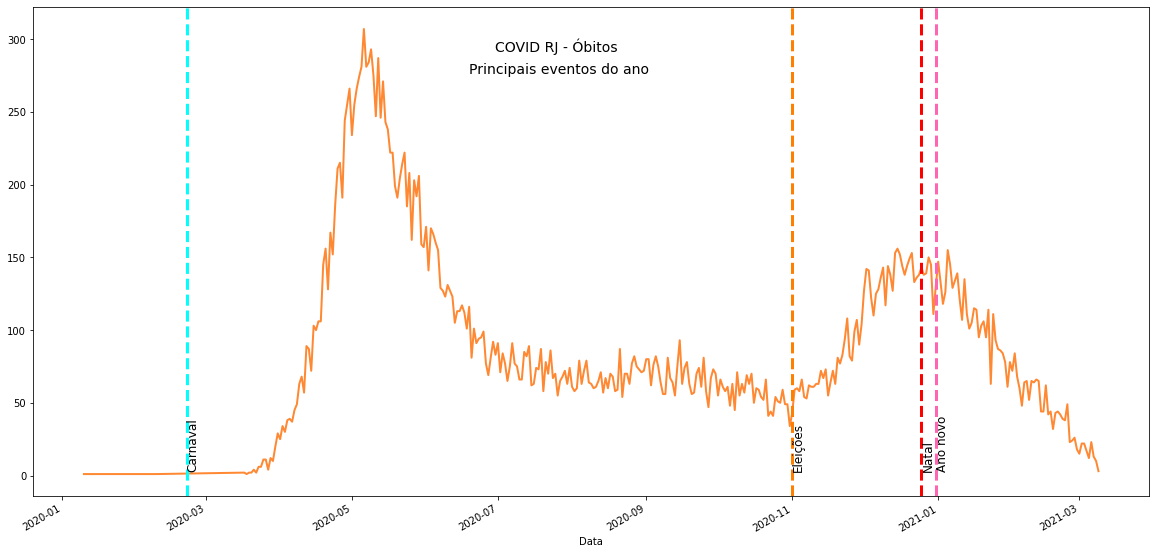

In [40]:
obitos['qt_pacientes'].plot(figsize=(20,10), color='#ff8833', linewidth=2)
plt.text(
    *get_coordenadas(obitos), 
    f'COVID RJ - Óbitos', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(obitos, offset_x=0.27, offset_y=0.9), 
    f'Principais eventos do ano', rotation=0, fontsize=14);
for evento in eventos:
    data, label, cor = evento
    plt.axvline(data, color=cor, linestyle="--", linewidth=3)
    plt.text(data, 5, label, rotation=90, fontsize='large')
plt.show()

Da mesma forma que no gráfico anterior, houve um aumento do número de óbitos após as eleiçoes. Novamente, após o Natal e o ano novo, houve um pequeno pico local, mas a curva continuou sua tendência de queda.

In [41]:
casos, dias = comparacao_ondas(obitos)

print(f'A segunda onda durou {dias:.2f}% do tempo da primeira onda e teve {casos:.2f}% de casos da primeira onda.')

A segunda onda durou 43.24% do tempo da primeira onda e teve 50.56% de casos da primeira onda.


Por fim, será plotado o gráfico de notificações com as três datas mencionadas acima.

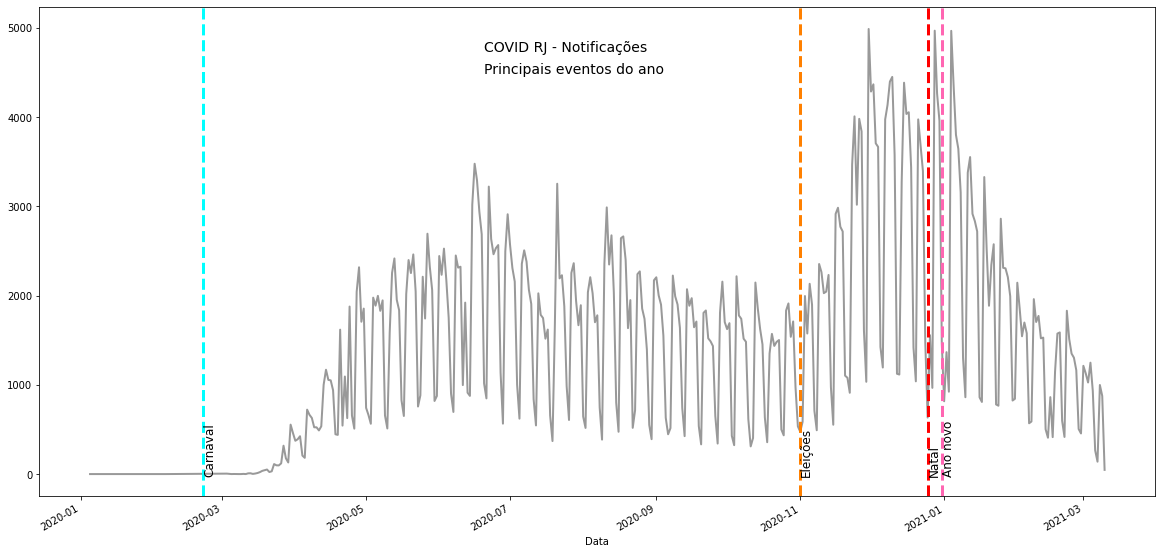

In [42]:
notificacoes['qt_pacientes'].plot(figsize=(20,10), color='#999999', linewidth=2)
plt.text(
    *get_coordenadas(notificacoes), 
    f'COVID RJ - Notificações', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(notificacoes, offset_y=0.9), 
    f'Principais eventos do ano', rotation=0, fontsize=14);
for evento in eventos:
    data, label, cor = evento
    plt.axvline(data, color=cor, linestyle="--", linewidth=3)
    plt.text(data, 5, label, rotation=90, fontsize='large')
plt.show()

Aqui também se pode observar uma segunda onda iniciada após as eleições e picos locais após as festas de Natal e ano novo. No entanto, esses picos locais foram mais altos que os anteriores, provavelmente em decorrência de uma acumulação maior de dias, em decorrência dos feriados prolongados, tendo sido cada um deles um feriado de 4 dias.

In [43]:
casos, dias = comparacao_ondas(notificacoes)

print(f'A segunda onda durou {dias:.2f}% do tempo que a primeira onda e teve {casos:.2f}% de casos da primeira onda.')

A segunda onda durou 42.86% do tempo que a primeira onda e teve 81.69% de casos da primeira onda.


Conforme o cálculo de comparação do total de casos e do total de dias entre as duas ondas, os dados acumulados pela data de notificação apresenta uma segunda onda com uma variação menor de casos em comparação com os dados acumulados pelas datas de primeiros sintomas e de óbitos. Vale ressaltar que a data da notificação não tem qualquer correlação com a evolução da doença, é apenas da data em que os dados foram inseridos no sistema.

### Maiores números de casos

Agora será analisado em que datas ocorreram o maior número de casos por semestre, por indicador: data de primeiros sintomas (contaminação), data de óbito e data de notificação. Para isso, será criada uma função que calcula cada valor máximo de cada semestre.

In [44]:
def get_maximos_semestres(dataframe: pd.DataFrame, feature='qt_pacientes') -> list:
    """
    Calcula o valor máximo da feature dentro de cada semestre.
    
    Parâmetros:
    -----------
        dataframe: pd.DataFrame
            Dataframe contendo os dados de escala a serem analisados.
        feature: str
            Nome da feature cujos máximos serão calculados.
    
    Retorno:
    --------
        maximos: list
            Lista contendo informações de máximo, label e cor.
    """
    limites_semestres = [ 
        datetime(2020,7,1),
        datetime(2021,1,1)
    ]
    
    maximos = []
    
    maximos.append([
        dataframe[
            dataframe.index < limites_semestres[0]
        ][feature].max(),
        '1o Semestre 2020',
    ])
    
    maximos.append([
        dataframe[
            (dataframe.index >= limites_semestres[0]) & \
            (dataframe.index < limites_semestres[1])
        ][feature].max(),
        '2o Semestre 2020',
    ])
    
    maximos.append([
        dataframe[
            dataframe.index >= limites_semestres[1]
        ][feature].max(),
        '1o Semestre 2021',
    ])
    
    maximos.sort(key=lambda x: x[0], reverse=True)
    
    cores = [
        '#ff0000',
        '#ff8000',
        '#ffff00'
    ]
    
    return [
        [*maximos[idx], cores[idx]]
        for idx in range(len(maximos))
    ]

Primeiro será plotado o gráfico com os maiores números de caso de contaminações.

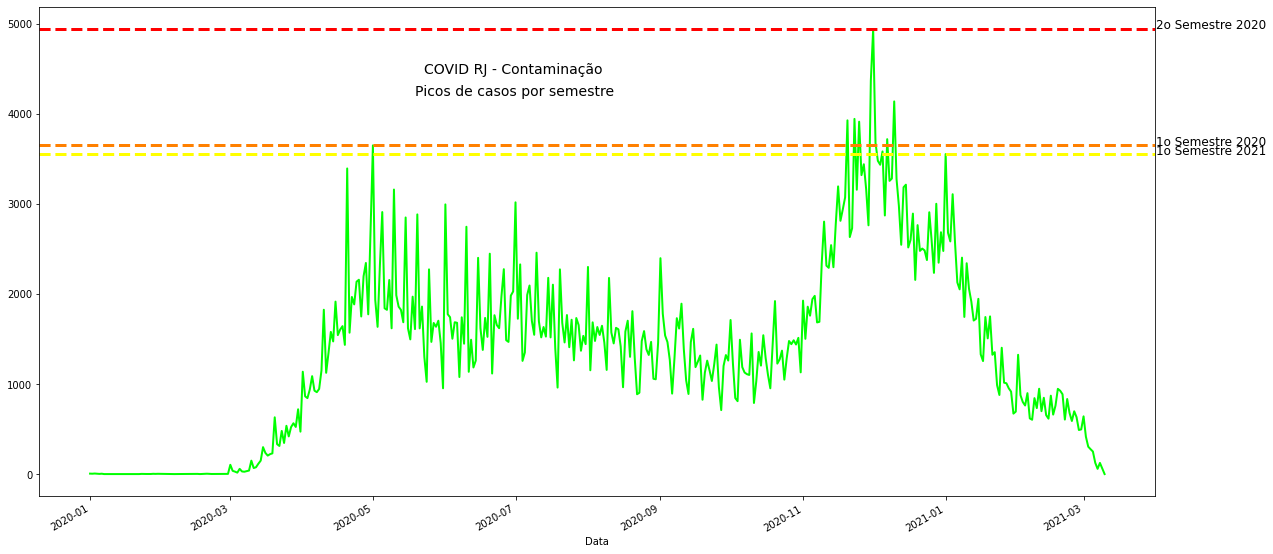

In [45]:
sintomas['qt_pacientes'].plot(figsize=(20,10), color='#00ff00', linewidth=2)
plt.text(
    *get_coordenadas(sintomas, offset_y=0.9), 
    f'COVID RJ - Contaminação', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(sintomas, offset_x=0.29, offset_y=0.85), 
    f'Picos de casos por semestre', rotation=0, fontsize=14);
for evento in get_maximos_semestres(sintomas):
    y, label, cor = evento
    plt.axhline(y, color=cor, linestyle="--", linewidth=3)
    plt.text(datetime(2021,4,1), y, label, rotation=0, fontsize='large')
plt.show()

O gráfico indica que o maior número de casos de contaminações ocorreu no segundo semestre. No ano novo houve um pico local, com valor semelhante ao pico atingido no primeiro semestre de 2020.

Agora será plotado o gráfico com os maiores números de caso de óbitos.

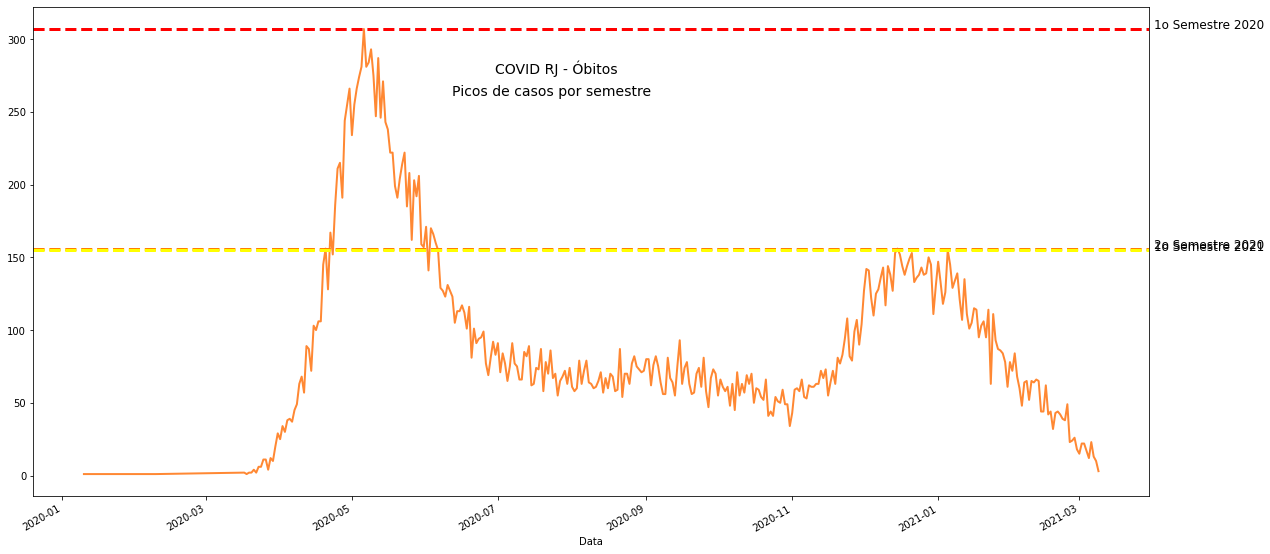

In [46]:
obitos['qt_pacientes'].plot(figsize=(20,10), color='#ff8833', linewidth=2)
plt.text(
    *get_coordenadas(obitos, offset_y=0.9), 
    f'COVID RJ - Óbitos', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(obitos, offset_x=0.25, offset_y=0.85), 
    f'Picos de casos por semestre', rotation=0, fontsize=14);
for evento in get_maximos_semestres(obitos):
    y, label, cor = evento
    plt.axhline(y, color=cor, linestyle="--", linewidth=3)
    plt.text(datetime(2021,4,1), y, label, rotation=0, fontsize='large')
plt.show()

Como se pode observar, o valor máximo de óbitos do primeiro semestre foi duas vezes maior que o valor máximo de óbitos do segundo semestre.

Por fim, será plotado o gráfico com os maiores números de caso de notificações.

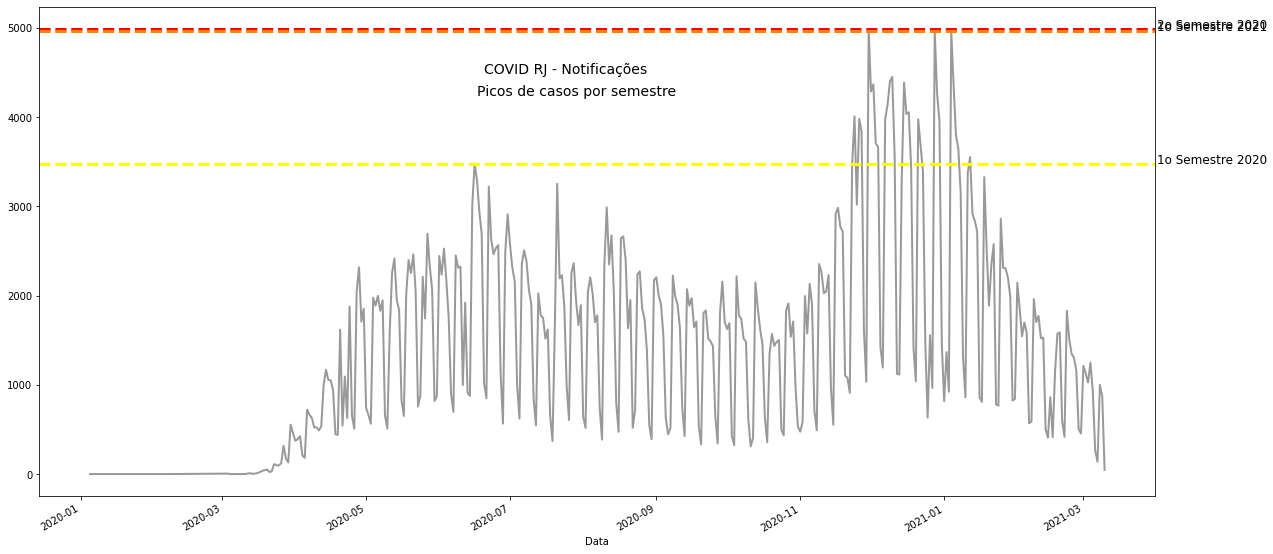

In [47]:
notificacoes['qt_pacientes'].plot(figsize=(20,10), color='#999999', linewidth=2)
plt.text(
    *get_coordenadas(notificacoes, offset_y=0.9), 
    f'COVID RJ - Notificações', rotation=0, fontsize=14);
plt.text(
    *get_coordenadas(notificacoes, offset_x=0.29, offset_y=0.85), 
    f'Picos de casos por semestre', rotation=0, fontsize=14);
for evento in get_maximos_semestres(notificacoes):
    y, label, cor = evento
    plt.axhline(y, color=cor, linestyle="--", linewidth=3)
    plt.text(datetime(2021,4,1), y, label, rotation=0, fontsize='large')
plt.show()

Os valores acumulados de notificações das festas de Natal e ano novo levam à conclusão incorreta de que a velocidade de contaminação acelerou na segunda onda. No entanto, o comprimento dessa segunda onda indica que a doença está desacelerando considerando os dados atuais.

## Conclusão

Como foi possível observar pelos gráficos acima, a COVID-19 no estado do Rio de Janeiro, segundo os dados oficiais, apresentou, até o momento, dia 6 de março de 2021, duas ondas, tanto de contaminação, quanto de óbitos, com picos no final de abril e no início de dezembro, no caso de contaminação, e no início de maio e em meados de dezembro, no caso de óbitos.

O comprimento e a altura da primeira onda de contaminação indica que havia uma margem maior de pessoas a serem contaminadas, uma vez que sua altura teve um decréscimo gradativo ao longo dos dias, enquanto a segunda onda demonstra que a doença está perdendo velocidade e logo deve estar controlada. O mesmo se pode observar com relação aos casos de óbitos.

Em relação ao indicador de notificações, se somente esse indicador estivesse disponível para a análise da evolução da doença, seria recomendável analisá-lo sempre pela ótica de uma média móvel, que diluiria a contaminação desse excesso de notificações dos primeiros dias das semanas em mais dias.

É importante ressaltar que muitas vezes esse valor acumula notificações de mais dias, uma vez que os pacientes demoram a decidir ir ao médico, pois os sintomas de COVID-19 são comuns a outras doenças, fazendo com que o paciente tenha a esperança de ser algo corriqueiro como um resfriado ou alergia. Conforme observamos, essa demora pode variar de 14 dias a 37 dias em média.

Assim, é recomendável não utilizar o indicador de data de notificação para analisar a evolução dos casos de COVID-19, porque, além da falta de correlação desse dado com a doença, as features dt_sintoma e dt_obito demonstram uma maior confiabilidade.

## Gráficos consolidados

Abaixo estão plotados os gráficos consolidados de médias móveis, máximos e eventos "festivos" para os indicadores de contaminação e óbitos.

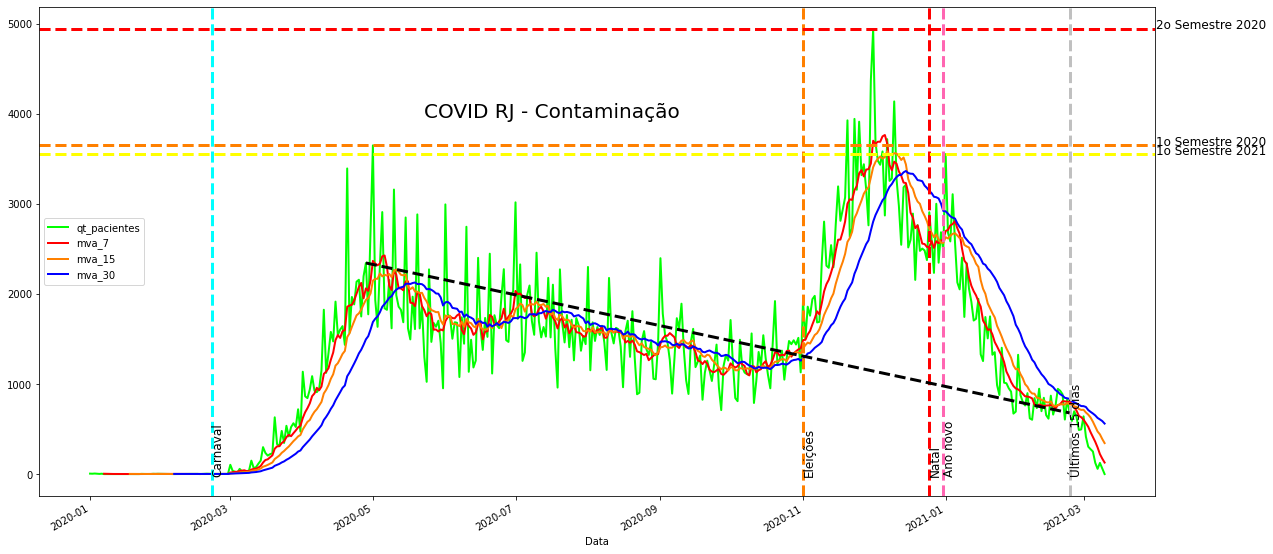

In [48]:
sintomas.plot(figsize=(20,10), color=['#00ff00', '#ff0000', '#ff8000', '#0000ff'], linewidth=2)

for evento in eventos:
    data, label, cor = evento
    plt.axvline(data, color=cor, linestyle="--", linewidth=3)
    plt.text(data, 5, label, rotation=90, fontsize='large')

for evento in get_maximos_semestres(sintomas):
    y, label, cor = evento
    plt.axhline(y, color=cor, linestyle="--", linewidth=3)
    plt.text(datetime(2021,4,1), y, label, rotation=0, fontsize='large')

ultimos_15_dias = sintomas.tail(n=1).index - timedelta(days=15)
plt.axvline(ultimos_15_dias, color='#c0c0c0', linestyle="--", linewidth=3)
plt.text(ultimos_15_dias, 5, 'Últimos 15 dias', rotation=90, fontsize='large')

x1 = datetime(2020,4,28)
y1 = sintomas[sintomas.index == x1].qt_pacientes.values[0]
x2 = ultimos_15_dias.to_pydatetime()[0]
y2 = sintomas[sintomas.index == x2].qt_pacientes.values[0]
plt.plot([x1, x2], [y1, y2], color='#000000', linestyle="--", linewidth=3)
    
plt.text(
    *get_coordenadas(sintomas, offset_y=0.8), 
    f'COVID RJ - Contaminação', rotation=0, fontsize=20);

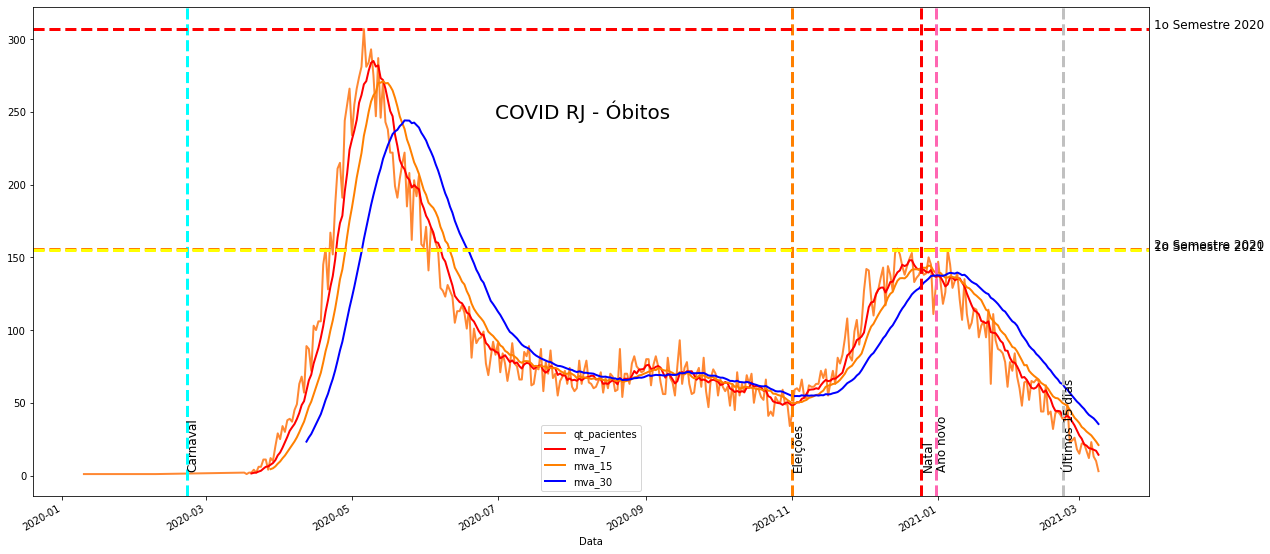

In [49]:
obitos.plot(figsize=(20,10), color=['#ff8833', '#ff0000', '#ff8000', '#0000ff'], linewidth=2)

for evento in eventos:
    data, label, cor = evento
    plt.axvline(data, color=cor, linestyle="--", linewidth=3)
    plt.text(data, 5, label, rotation=90, fontsize='large')

for evento in get_maximos_semestres(obitos):
    y, label, cor = evento
    plt.axhline(y, color=cor, linestyle="--", linewidth=3)
    plt.text(datetime(2021,4,1), y, label, rotation=0, fontsize='large')

ultimos_15_dias = obitos.tail(n=1).index - timedelta(days=15)
plt.axvline(ultimos_15_dias, color='#c0c0c0', linestyle="--", linewidth=3)
plt.text(ultimos_15_dias, 5, 'Últimos 15 dias', rotation=90, fontsize='large')

plt.text(
    *get_coordenadas(obitos, offset_y=0.8), 
    f'COVID RJ - Óbitos', rotation=0, fontsize=20);